# Principal Component Analysis with the SVD

Principal component analysis (PCA) seeks to reduce high dimensional data entries to lower dimensional components. The image below shows the directions of most variance. These directions will have the most impact on our model and will be our "principal components".

![title](PCA_Cloud.png)

In [1]:
using LinearAlgebra, CSV, Plots

In [2]:
m, n = 434, 17;

### Reading in the data from our table

In [7]:
data = CSV.read("house-votes-84.data")

,republican,n,y,n_1,y_1,y_2,y_3,n_2,n_3,n_4,y_4,?,y_5,y_6,y_7,n_5,y_8
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


### Replacing our character entries with numeric entries 

In [8]:
A_0 = zeros(m, n-1)
for i in 1:434
    for j in 2:17
        if data[i,j] == "y"
            A_0[i,j-1] = 1

        elseif data[i,j] == "n"
            A_0[i,j-1] = 0
        
        elseif data[i,j] == "?"
            A_0[i,j-1] = -1
        end   
    end
end
A_0 = A_0';

### Splitting our data into training and testing for future analysis.

In [9]:
training = A_0[:,1:350]
testing = A_0[:,351:434];

### Next to center the data by subtracting the mean of every row from each entry in that row.

In [10]:
A = copy(training)
for i = 1:size(A)[1]
    
    # Calculate the mean of the i-th row
    μ = sum(A[i,:]) / size(A)[2]
    
    # Subtract the mean from each entry in the i-th row
    for j = 1:size(A)[2]
        A[i,j] -= μ
    end
end

### Next, compute the covariance matrix S.

In [11]:
S = A*A'/(433) # n-1 = 433

16×16 Array{Float64,2}:
  0.230947      0.0133949    0.0942263   …   0.0669746  -0.000461894
  0.0133949     0.361867     0.0132366      -0.0110525   0.0146222  
  0.0942263     0.0132366    0.235539        0.116133    0.00366876 
 -0.0577367     0.0317387   -0.128274       -0.0864401   0.021841   
 -0.0628176     0.04613     -0.128301       -0.0938634   0.0232003  
 -0.0702079     0.04        -0.0851732   …  -0.073903    0.0122864  
  0.0803695    -0.0295546    0.128908        0.106401    0.0540812  
  0.0900693    -0.0310459    0.155526        0.10838     0.021577   
  0.0508083    -0.0337512    0.109271        0.0892445   0.0584626  
 -0.0143187    -0.0056351    0.00683603      0.0184758   0.0728868  
  0.030485      0.0818806    0.0580271   …   0.0654899   0.0474035  
 -0.0600462     0.0199274   -0.113692       -0.0768723   0.0271857  
 -0.0623557     0.0665127   -0.0974596      -0.073903    0.0341801  
 -0.0558891     0.00495546  -0.114378       -0.0839657   0.0555988  
  0.066974

### Compute the SVD and save the 3 outputs.

In [12]:
U, Σ, V = svd(S);

## Part B. Visualize the singular values.

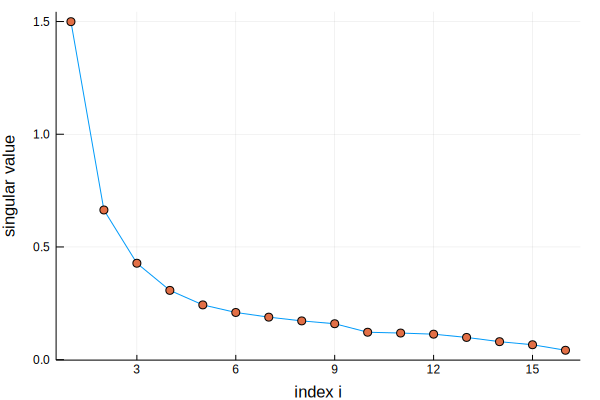

In [13]:
plot(Σ)
scatter!(Σ, legend = false, xaxis = "index i", yaxis = "singular value")

#### From the plot, we can see that most of variance can be explained by the first two singular values. 
#### We will use this for our further examination.

## Part C. Visualize the data projected onto the principal components.

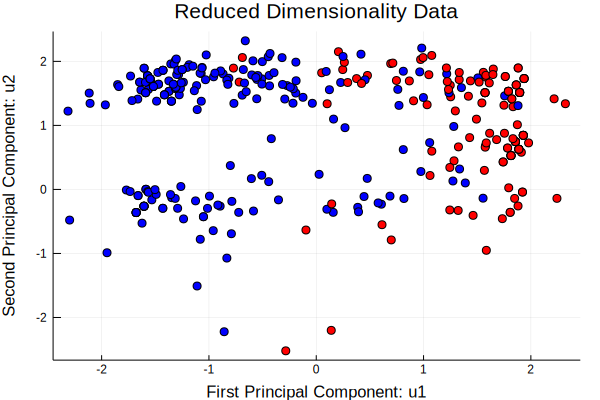

In [14]:
U_reduced = U[:, 1:2]
scatter(xaxis = "First Principal Component: u1",
        yaxis = "Second Principal Component: u2",
        legend = false,
        title = "Reduced Dimensionality Data")

    for i = 1:size(training)[2]
        p = U_reduced'*training[:, i]
        party = data[i, 1] == "republican" ? "red" : "blue"
        scatter!([(p[1], p[2])], color = party)
    end

scatter!()


In [15]:
training_data = U_reduced'*training
training_data = [(training_data[1, i], training_data[2,i]) for i = 1:300];

### Defining a distance function

In [16]:
function euclidean_distance(p1, p2)
    return sqrt( (p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)
end

euclidean_distance (generic function with 1 method)

### Defining a function to calculate the k-nearest neighbors and plot our new point and the closest neighbors.

In [17]:
function KNN_prediction(k, i)
    # Our function takes in k, the number of neighbors
    # and i, the point in our testing set that we want to predict on. Numbered 1-84.
    # There is no return statement. The function will output the plot and our prediction for that point.
    
    point = U_reduced'*testing[:, i]                                # Projecting our point to a lower dimension
    point = (point[1], point[2])                                    # Grabbing the x and y coordinates for the point
    training_data = U_reduced'*A_0
    training_data = U_reduced'*training                             # Reducing the entire training set to 2 dimensions
    training_data = [(training_data[1, j], training_data[2,j])
                        for j = 1:size(training_data)[2]]
    
    
    # Calculating the distance from our point to each of the other points and storing them in neighbors
    neighbors = []
    for j = 1:length(training_data)
        p = training_data[j]
        dist = euclidean_distance(point, p)
        push!(neighbors, (data[j, 1], p, dist))
    end
    sort!(neighbors, by = x -> x[3])                                # Here we sort our neighbors by proximity 
    neighbors = neighbors[1:k]                                      # Slim down our choices by only the k-nearest-neighbors

    
    
    # The initial plot call, which will create it and add labels and the main title
    scatter(xaxis = "First Principal Component: u1",
        yaxis = "Second Principal Component: u2",
        legend = false,
        title = "Reduced Dimensionality Data")

    
    # Adding each point from our data and coloring it depending on whether they are Republican or Democrat
    for i = 1:size(training)[2]
        p = U_reduced'*training[:, i]
        party = data[i, 1] == "republican" ? "red" : "blue"
        scatter!([(p[1], p[2])], color = party)
    end


    # Plotting our point and the neighbors according to their political party
    for i = 1:k
    plot!([point, neighbors[i][2]], color = "yellow")
    scatter!([point, neighbors[i][2]], color = neighbors[i][1] == "republican" ? "red" : "blue")
    end
    
    # Counting if our neighbors are Republic or Democrat. The count with the most will "identify" our neighbor as that party.
    D = 0
    R = 0
    for i = 1:length(neighbors)
        if (neighbors[i, 1][1]) == "republican"
            R+= 1    
        else 
            D+=1
        end
    end
    party = R > D ? "republican" : "democrat"
    println("Congress member ",i, " is predicted to be a member of ", party)

    # Finally plotting our point.
    scatter!( [point], label = party, color = "white" )

end

KNN_prediction (generic function with 1 method)

Congress member 22 is predicted to be a member of republican


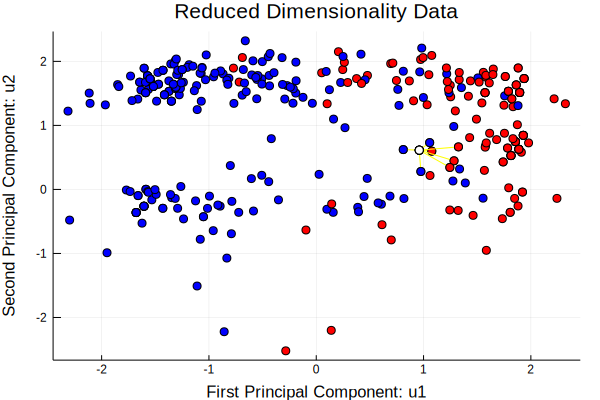

In [18]:
KNN_prediction(7, 22)

Congress member 44 is predicted to be a member of democrat


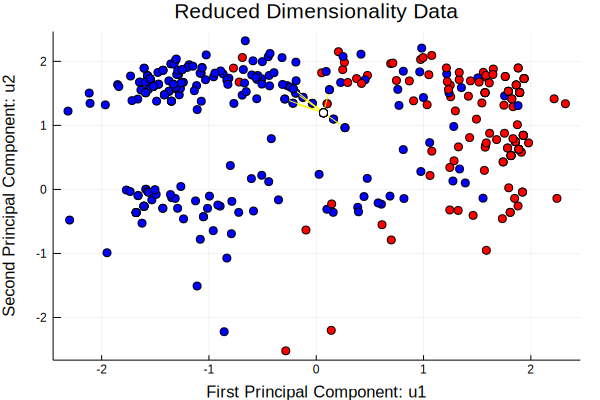

In [19]:
KNN_prediction(10, 44)

Congress member 1 is predicted to be a member of republican


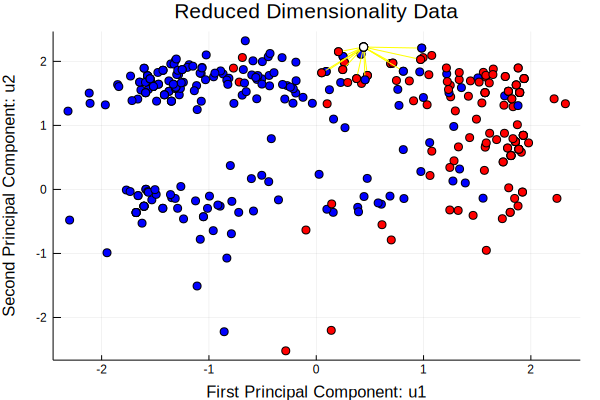

In [20]:
KNN_prediction(15, 1)